# Boxplots

/var/folders/v4/vr3wk_q55dbbq68v6wdr2mrh0000gn/T/ipykernel_78175/3277688060.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x=x, y=y, data=data, ax=ax, widths=0.5, palette='pastel')


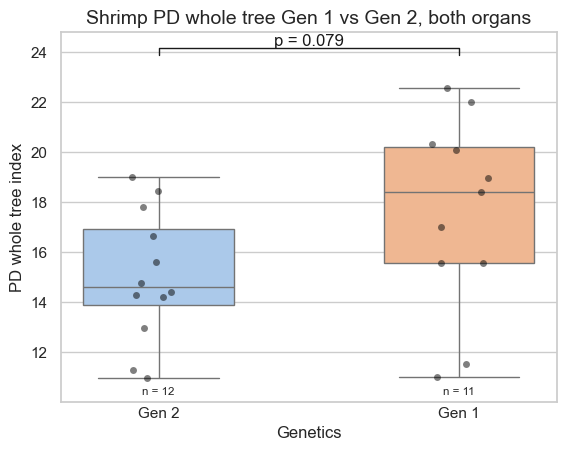

/var/folders/v4/vr3wk_q55dbbq68v6wdr2mrh0000gn/T/ipykernel_78175/3277688060.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x=x, y=y, data=data, ax=ax, widths=0.5, palette='pastel')


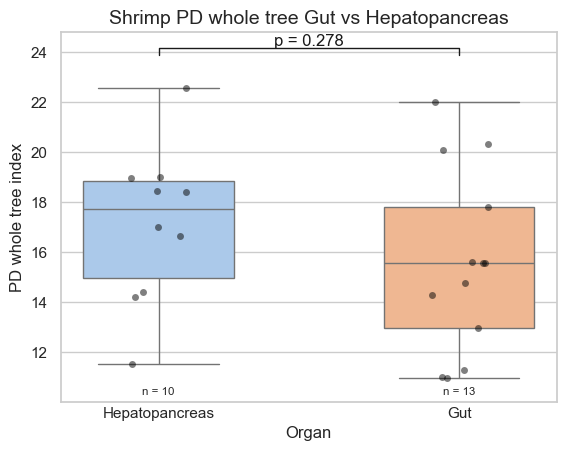

/var/folders/v4/vr3wk_q55dbbq68v6wdr2mrh0000gn/T/ipykernel_78175/3277688060.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x=x, y=y, data=data, ax=ax, widths=0.5, palette='pastel')


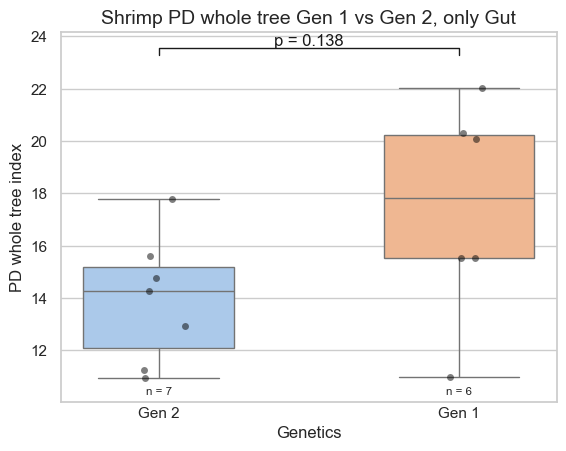

/var/folders/v4/vr3wk_q55dbbq68v6wdr2mrh0000gn/T/ipykernel_78175/3277688060.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x=x, y=y, data=data, ax=ax, widths=0.5, palette='pastel')


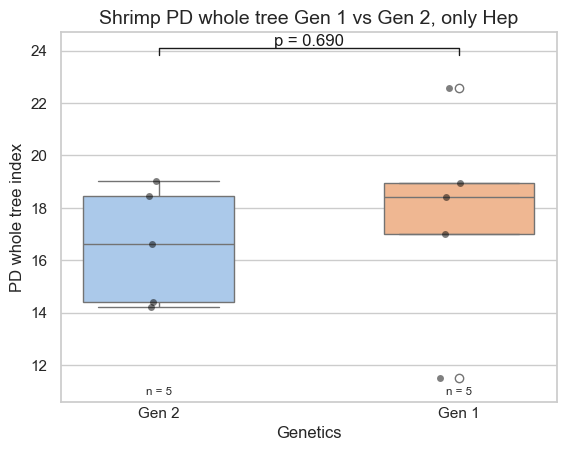

In [65]:
# %pip install pandas seaborn matplotlib scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats

# Load the data
data = pd.read_csv("./data_shrimp.tsv", sep="\t")

data_gut = data[data["Organ"] == "Gut"]
data_hepatopancreas = data[data["Organ"] == "Hepatopancreas"]

def box_and_whisker(data, x, y, title, ylabel, figure_name):
    """
    Create a box-and-whisker plot with p-value bars and individual data points.
    """
    ax = plt.axes()
    bp = sns.boxplot(x=x, y=y, data=data, ax=ax, widths=0.5, palette='pastel')
    # Overlay individual data points
    sns.stripplot(x=x, y=y, data=data, ax=ax, color='black', alpha=0.5, jitter=True)
    # Graph title
    ax.set_title(title, fontsize=14)
    # Label y-axis
    ax.set_ylabel(ylabel)
    # Hide x-axis major ticks
    ax.tick_params(axis="x", which="major", length=0)
    # Show x-axis minor ticks
    xticks = [0.5] + [x + 0.5 for x in ax.get_xticks()]
    ax.set_xticks(xticks, minor=True)
    # Clean up the appearance
    ax.tick_params(axis="x", which="minor", length=3, width=1)

    # Change the colour of the boxes to Seaborn's 'pastel' palette
    colors = sns.color_palette("pastel")
    for patch, color in zip(bp.artists, colors):
        patch.set_facecolor(color)

    # Check for statistical significance
    significant_combinations = []
    unique_categories = data[x].unique()
    combinations = list(itertools.combinations(unique_categories, 2))
    for combination in combinations:
        data1 = data[data[x] == combination[0]][y]
        data2 = data[data[x] == combination[1]][y]
        # Significance
        U, p = stats.mannwhitneyu(data1, data2, alternative="two-sided")
        significant_combinations.append([combination, p])

    # Get info about y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom

    # Map categories to their positions
    category_positions = {category: pos for pos, category in enumerate(unique_categories)}

    # Significance bars
    for i, significant_combination in enumerate(significant_combinations):
        # Columns corresponding to the datasets of interest
        x1 = category_positions[significant_combination[0][0]]
        x2 = category_positions[significant_combination[0][1]]
        # What level is this bar among the bars above the plot?
        level = len(significant_combinations) - i
        # Plot the bar
        bar_height = (yrange * 0.08 * level) + top
        bar_tips = bar_height - (yrange * 0.02)
        plt.plot(
            [x1, x1, x2, x2], [bar_tips, bar_height, bar_height, bar_tips], lw=1, c="k"
        )
        # Significance level
        p = significant_combination[1]
        text_height = bar_height + (yrange * 0.01)
        plt.text((x1 + x2) * 0.5, text_height, f"p = {p:.3f}", ha="center", c="k")

    # Adjust y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom
    ax.set_ylim(bottom - 0.02 * yrange, top)

    # Annotate sample size below each box
    for i, category in enumerate(unique_categories):
        sample_size = len(data[data[x] == category])
        ax.text(i, bottom, rf"n = {sample_size}", ha="center", size="x-small")

    plt.savefig(f"{figure_name}.png")
    plt.show()

# Box-and-whisker plot of the data
# Genetics, both organs
box_and_whisker(
    data=data,
    x="Genetics",
    y="PD_whole_tree_Ave",
    title="Shrimp PD whole tree Gen 1 vs Gen 2, both organs",
    ylabel="PD whole tree index",
    figure_name="gen_shrimp_PD_whole_tree_Gen1_vs_Gen2_both_organs",
)

# Genetics, organ
box_and_whisker(
    data=data,
    x="Organ",
    y="PD_whole_tree_Ave",
    title="Shrimp PD whole tree Gut vs Hepatopancreas",
    ylabel="PD whole tree index",
    figure_name="organ_shrimp_PD_whole_tree_Gen1_vs_Gen2",
)

# Genetics gut
box_and_whisker(
    data=data_gut,
    x="Genetics",
    y="PD_whole_tree_Ave",
    title="Shrimp PD whole tree Gen 1 vs Gen 2, only Gut",
    ylabel="PD whole tree index",
    figure_name="gen_shrimp_PD_whole_tree_Gen1_vs_Gen2_gut",
)

box_and_whisker(
    data=data_hepatopancreas,
    x="Genetics",
    y="PD_whole_tree_Ave",
    title="Shrimp PD whole tree Gen 1 vs Gen 2, only Hep",
    ylabel="PD whole tree index",
    figure_name="gen_shrimp_PD_whole_tree_Gen1_vs_Gen2_hep",
)

In [ ]:
# %pip install pandas seaborn matplotlib scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats

# Load the data
data = pd.read_csv("./data_shrimp.tsv", sep="\t")

def box_and_whisker(data, x, y, title, ylabel):
    """
    Create a box-and-whisker plot with p-value bars and individual data points.
    """
    ax = plt.axes()
    bp = sns.boxplot(x=x, y=y, data=data, ax=ax, widths=0.5, palette='pastel')
    # Overlay individual data points
    sns.stripplot(x=x, y=y, data=data, ax=ax, color='black', alpha=0.5, jitter=True)
    # Graph title
    ax.set_title(title, fontsize=14)
    # Label y-axis
    ax.set_ylabel(ylabel)
    # Hide x-axis major ticks
    ax.tick_params(axis="x", which="major", length=0)
    # Show x-axis minor ticks
    xticks = [0.5] + [x + 0.5 for x in ax.get_xticks()]
    ax.set_xticks(xticks, minor=True)
    # Clean up the appearance
    ax.tick_params(axis="x", which="minor", length=3, width=1)

    # Change the colour of the boxes to Seaborn's 'pastel' palette
    colors = sns.color_palette("pastel")
    for patch, color in zip(bp.artists, colors):
        patch.set_facecolor(color)

    # Check for statistical significance
    significant_combinations = []
    unique_categories = data[x].unique()
    combinations = list(itertools.combinations(unique_categories, 2))
    for combination in combinations:
        data1 = data[data[x] == combination[0]][y]
        data2 = data[data[x] == combination[1]][y]
        # Significance
        U, p = stats.mannwhitneyu(data1, data2, alternative="two-sided")
        significant_combinations.append([combination, p])

    # Get info about y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom

    # Map categories to their positions
    category_positions = {category: pos for pos, category in enumerate(unique_categories)}

    # Significance bars
    for i, significant_combination in enumerate(significant_combinations):
        # Columns corresponding to the datasets of interest
        x1 = category_positions[significant_combination[0][0]]
        x2 = category_positions[significant_combination[0][1]]
        # What level is this bar among the bars above the plot?
        level = len(significant_combinations) - i
        # Plot the bar
        bar_height = (yrange * 0.08 * level) + top
        bar_tips = bar_height - (yrange * 0.02)
        plt.plot(
            [x1, x1, x2, x2], [bar_tips, bar_height, bar_height, bar_tips], lw=1, c="k"
        )
        # Significance level
        p = significant_combination[1]
        text_height = bar_height + (yrange * 0.01)
        plt.text((x1 + x2) * 0.5, text_height, f"p = {p:.3f}", ha="center", c="k")

    # Adjust y-axis
    bottom, top = ax.get_ylim()
    yrange = top - bottom
    ax.set_ylim(bottom - 0.02 * yrange, top)

    # Annotate sample size below each box
    for i, category in enumerate(unique_categories):
        sample_size = len(data[data[x] == category])
        ax.text(i, bottom, rf"n = {sample_size}", ha="center", size="x-small")

    plt.show()

# Box-and-whisker plot of the data
box_and_whisker(
    data=data,
    x="Genetics",
    y="PD_whole_tree_Ave",
    title="Shrimp PD whole tree Gen 1 vs Gen 2",
    ylabel="PD whole tree index",
)